## Data description

### Important Terms

- **Clinical Case**: The scenario (e.g., symptoms, complaints, concerns) the Standardized Patient presents to the test taker (medical student, resident or physician). Ten clinical cases are represented in this dataset.
- **Patient Note**: Text detailing important information related by the patient during the encounter (physical exam and interview).
- **Feature**: A clinically relevant concept. A rubric describes the key concepts relevant to each case.

### Training Data

<ul>
    <li>
        <b>patient_notes.csv</b> - A collection of about 40,000 Patient Note history portions. Only a subset of these have features annotated. You may wish to apply unsupervised learning techniques on the notes without annotations. The patient notes in the test set are not included in the public version of this file.
        <ul><li>pn_num - A unique identifier for each patient note.</li></ul>
        <ul><li>case_num - A unique identifier for the clinical case a patient note represents.</li></ul>
        <ul><li>pn_history - The text of the encounter as recorded by the test taker.</li></ul>
    </li>
    <li>
        <b>features.csv</b> - The rubric of features (or key concepts) for each clinical case.
            <ul><li>feature_num - A unique identifier for each feature.</li></ul>
            <ul><li>case_num - A unique identifier for each case.</li></ul>
            <ul><li>feature_text - A description of the feature.</li></ul>
    </li>
    <li>
        <b>train.csv</b> - Feature annotations for 1000 of the patient notes, 100 for each of ten cases.
                <ul><li>id - Unique identifier for each patient note / feature pair.</li></ul>
                <ul><li>pn_num - The patient note annotated in this row.</li></ul>
                <ul><li>feature_num - The feature annotated in this row.</li></ul>
                <ul><li>case_num - The case to which this patient note belongs.</li></ul>
                <ul><li>annotation - The text(s) within a patient note indicating a feature. A feature may be indicated multiple times within a single note.</li></ul>
                <ul><li>location - Character spans indicating the location of each annotation within the note. Multiple spans may be needed to represent an annotation, in which case the spans are delimited by a semicolon ;.</li></ul>
   </li>
</ul>

### So, we need to predict annotation based on Scripts (pn_history) and Symptoms (feature_text)

In [1]:
import sys
sys.path.append("..")

In [2]:
import os

import matplotlib.pyplot as plt

import pandas as pd

from src.visualization import plot_data, plot_utils

## Constants

In [3]:
data_folder = os.path.join("/", "data")
raw_folder = os.path.join(data_folder, "raw")

patient_notes_file_path = os.path.join(raw_folder, "patient_notes.csv")
features_file_path = os.path.join(raw_folder, "features.csv")
train_file_path = os.path.join(raw_folder, "train.csv")
test_file_path = os.path.join(raw_folder, "test.csv")

## Extract

In [4]:
patient_notes_df = pd.read_csv(patient_notes_file_path)
patient_notes_df.head()

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."
1,1,0,17 yo male with recurrent palpitations for the...
2,2,0,Dillon Cleveland is a 17 y.o. male patient wit...
3,3,0,a 17 yo m c/o palpitation started 3 mos ago; \...
4,4,0,17yo male with no pmh here for evaluation of p...


In [5]:
features_df = pd.read_csv(features_file_path)
features_df.head()

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded


In [6]:
train_df = pd.read_csv(train_file_path)
train_df.head()

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']


In [7]:
test_df = pd.read_csv(test_file_path)
test_df.head()

,id,case_num,pn_num,feature_num
0,00016_000,0,16,0
1,00016_001,0,16,1
2,00016_002,0,16,2
3,00016_003,0,16,3
4,00016_004,0,16,4


## Transform

### Create full train dataset with:
1. train
2. features
3. patient notes

In [8]:
train_df = pd.merge(
    train_df, features_df, how='left', on=["feature_num", "case_num"])

train_df = pd.merge(
    train_df, patient_notes_df, how='left', on=['pn_num', 'case_num'])

train_df.head()

,id,case_num,pn_num,feature_num,annotation,location,feature_text,pn_history
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724'],Family-history-of-MI-OR-Family-history-of-myoc...,HPI: 17yo M presents with palpitations. Patien...
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693'],Family-history-of-thyroid-disorder,HPI: 17yo M presents with palpitations. Patien...
2,00016_002,0,16,2,['chest pressure'],['203 217'],Chest-pressure,HPI: 17yo M presents with palpitations. Patien...
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']",Intermittent-symptoms,HPI: 17yo M presents with palpitations. Patien...
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258'],Lightheaded,HPI: 17yo M presents with palpitations. Patien...


### Create full test dataset with:
1. test
2. features
3. patient notes

In [9]:
test_df = pd.merge(
    test_df, features_df, how='left', on=["feature_num", "case_num"])

test_df = pd.merge(
    test_df, patient_notes_df, how='left', on=['pn_num', 'case_num'])

test_df.head()

,id,case_num,pn_num,feature_num,feature_text,pn_history
0,00016_000,0,16,0,Family-history-of-MI-OR-Family-history-of-myoc...,HPI: 17yo M presents with palpitations. Patien...
1,00016_001,0,16,1,Family-history-of-thyroid-disorder,HPI: 17yo M presents with palpitations. Patien...
2,00016_002,0,16,2,Chest-pressure,HPI: 17yo M presents with palpitations. Patien...
3,00016_003,0,16,3,Intermittent-symptoms,HPI: 17yo M presents with palpitations. Patien...
4,00016_004,0,16,4,Lightheaded,HPI: 17yo M presents with palpitations. Patien...


## Analysis

### Check nulls for each dataset

In [10]:
plot_data.plot_nulls_per_column(train_df)

In [11]:
plot_data.plot_nulls_per_column(test_df)

### Patient notes (patient_notes.csv)

Random patient note example

In [12]:
patient_notes_df.sample(n=1)["pn_history"].values[0]

'HPI: 20 yo F presented with abdominal pain of a few hours duration. Pain in RLQ, dull crampy in character, does not go anywhere, is 5/10 in severity, worse with movement, and only slightly alleviated by ibuprofen. She had 4 similar episodes of this pain in the last 6 months. No relation to food. She also complains of diarrhea with loose watery stools, no blood and no mucus, 4-5 times a day, associated with this pain. She has decreased appetite since yesterday but no subjective feeling of warmth. No sick contacts or recent travel history.\r\nROS: negative except as above\r\nAllergy: none\r\nMedication: ibuprofen\r\nGU: LMP 2 weeks ago, 28-day cycle with 4 day menses. No HX of STIs or increased bleeding\r\nPMH/PSH: none\r\nSH: no history of travel, she last had sex with her BF 9 months ago. No smoking, no EtOH, no illicit drug use, no travel history. No change in weight or energy level.'

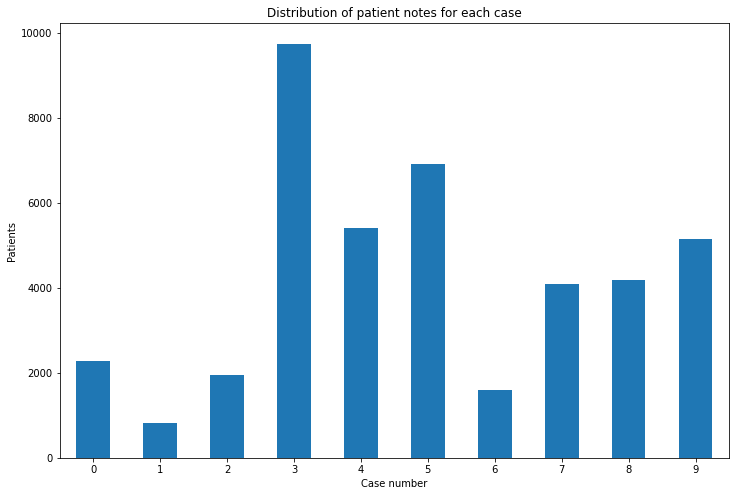

In [13]:
_ = patient_notes_df \
    .groupby("case_num") \
    .size() \
    .plot(kind="bar", figsize=(12, 8), rot=0, xlabel="Case number", 
          ylabel="Patients", title="Distribution of patient notes for each case")

In [14]:
patient_notes_df["history_len"] = patient_notes_df.pn_history.str.len()

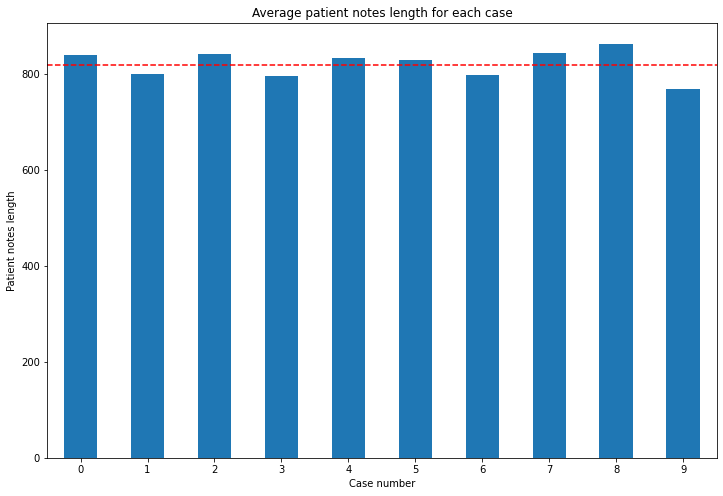

In [15]:
ax = patient_notes_df \
    .groupby("case_num") \
    .history_len \
    .mean() \
    .plot(kind="bar", figsize=(12, 8), rot=0, xlabel="Case number", 
          ylabel="Patient notes length", title="Average patient notes length for each case")
_ = ax.axhline(y=patient_notes_df.history_len.mean(), color="r", linestyle="--")

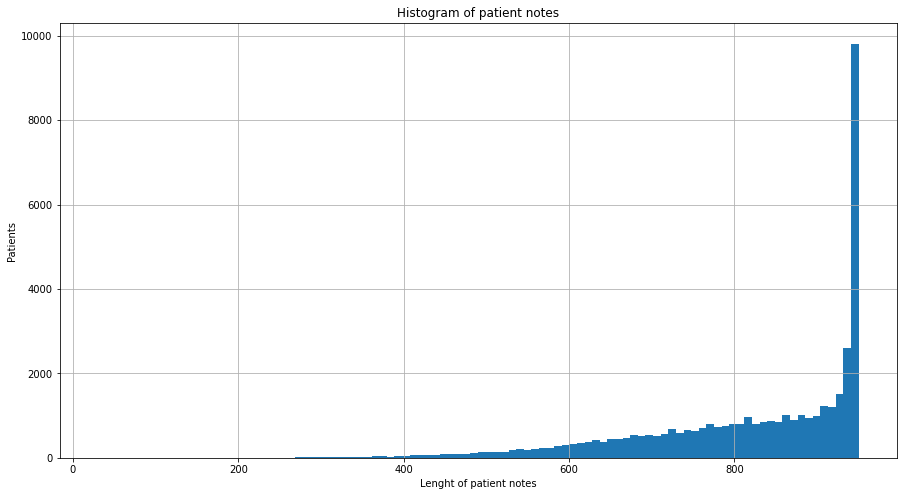

In [16]:
plot_utils.plot_histogram(
    patient_notes_df.history_len, bins=100, title="Histogram of patient notes", 
    y_label="Patients", x_label="Lenght of patient notes")

### Features data (features.csv)

In [17]:
features_df

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded
...,...,...,...
138,912,9,Family-history-of-migraines
139,913,9,Female
140,914,9,Photophobia
141,915,9,No-known-illness-contacts


Feature example

In [18]:
features_df.sample(n=1).feature_text.values[0]

'No-premenstrual-symptoms'

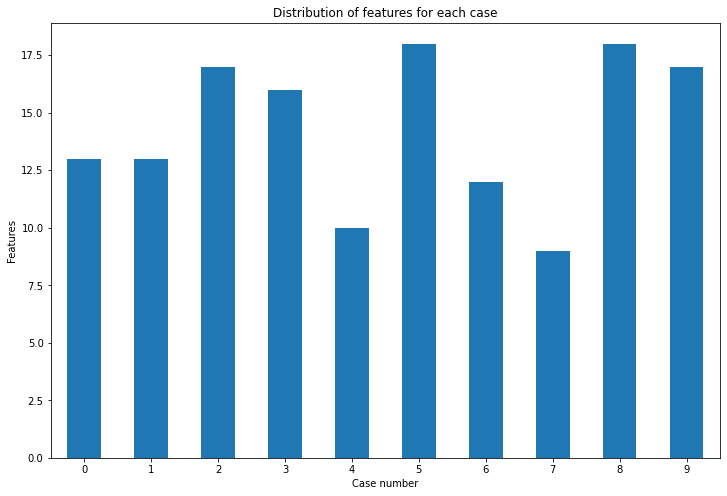

In [19]:
_ = features_df \
    .groupby("case_num") \
    .size() \
    .plot(kind="bar", figsize=(12, 8), rot=0, xlabel="Case number", 
          ylabel="Features", title="Distribution of features for each case")

In [20]:
features_df["feature_len"] = features_df.feature_text.str.len()

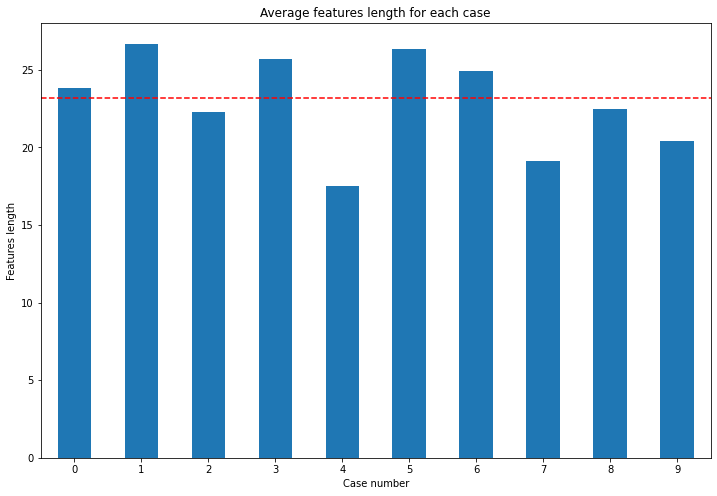

In [21]:
ax = features_df \
    .groupby("case_num") \
    .feature_len \
    .mean() \
    .plot(kind="bar", figsize=(12, 8), rot=0, xlabel="Case number", 
          ylabel="Features length", title="Average features length for each case")
_ = ax.axhline(y=features_df.feature_len.mean(), color="r", linestyle="--")

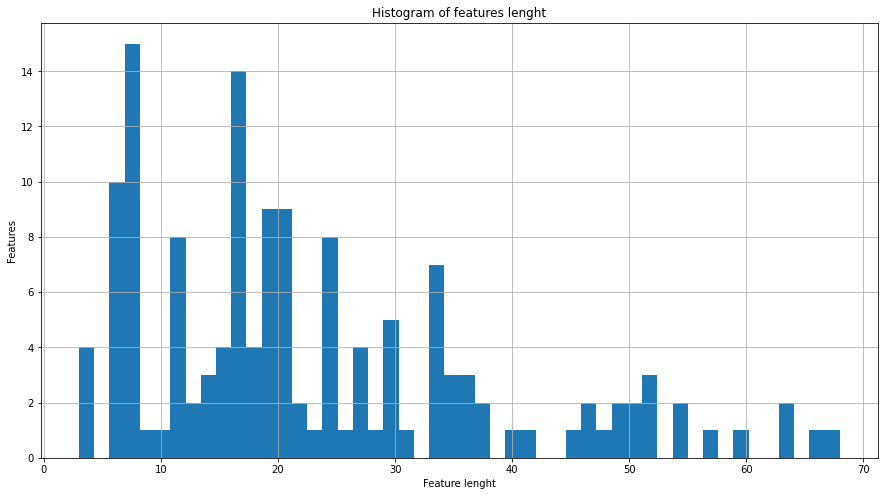

In [22]:
plot_utils.plot_histogram(
    features_df["feature_len"], bins=50, title="Histogram of features lenght", 
    x_label="Feature lenght", y_label="Features")

### Patient analysis

In [23]:
print(f"Unique patients in train data {train_df.pn_num.nunique()}")

Unique patients in train data 1000


In [24]:
random_patient_id = train_df.sample(n=1).pn_num.values[0]

In [25]:
cond_patient = train_df.pn_num == random_patient_id
patient_df = train_df[cond_patient]

patient_df

,id,case_num,pn_num,feature_num,annotation,location,feature_text,pn_history
78,00188_000,0,188,0,['father heart attach'],['716 735'],Family-history-of-MI-OR-Family-history-of-myoc...,17 yo M college student comes to the clinic du...
79,00188_001,0,188,1,['Mother thyroid disease'],['692 714'],Family-history-of-thyroid-disorder,17 yo M college student comes to the clinic du...
80,00188_002,0,188,2,['chest pressure'],['250 264'],Chest-pressure,17 yo M college student comes to the clinic du...
81,00188_003,0,188,3,"['episodes', 'episodes']","['93 101', '284 292']",Intermittent-symptoms,17 yo M college student comes to the clinic du...
82,00188_004,0,188,4,[],[],Lightheaded,17 yo M college student comes to the clinic du...
83,00188_005,0,188,5,[],[],No-hair-changes-OR-no-nail-changes-OR-no-tempe...,17 yo M college student comes to the clinic du...
84,00188_006,0,188,6,"['aderol', 'aderol', 'aderol']","['457 463', '507 513', '655 661']",Adderall-use,17 yo M college student comes to the clinic du...
85,00188_007,0,188,7,[],[],Shortness-of-breath,17 yo M college student comes to the clinic du...
86,00188_008,0,188,8,[],[],Caffeine-use,17 yo M college student comes to the clinic du...
87,00188_009,0,188,9,"['heart pounding', 'heart pounding', 'palpitat...","['51 65', '105 119', '577 589']",heart-pounding-OR-heart-racing,17 yo M college student comes to the clinic du...


In [26]:
print(f"Patient ({random_patient_id}) notes:\n")
cond_patient = patient_notes_df.pn_num == random_patient_id
print(patient_notes_df[cond_patient].pn_history.values[0])
print("\033[92m\nAnnotations:")
for annotation in patient_df.annotation:
    print(annotation)
    
print("\033[94m\nLocations")
for location in patient_df.location:
    print(location)

Patient (188) notes:

17 yo M college student comes to the clinic due to heart pounding.  He states the he has had episodes of heart pounding for the last 3-4 months.  Nothing makes it better or worse and it goes away on its own.  he denies any chest pain but does report chest pressure during some of the episodes.  He denies warmth or sweating, recent illness, abdominal pain or N/V, tingling in extremities, recent illness or trauma.  He is new to college and has been taking aderol a few times a week.  The last time he took aderol was 2 days ago, which was also the last time he had episode of palpitations.  
ROS: negative except for above
PMH, PSH: none, medications: aderol self administered.  knda, FH: Mother thyroid disease, father heart attach at 52 is okay now.  SH: no changes in weight or appetite, he is on the meal plan and tries to be healthy, he plays intermural soccer and runs, no smoking, alcohol hx.  Triend marijuanna, uses aderol. Stress college

Annotations:
['father heart 

### Annotation analysis

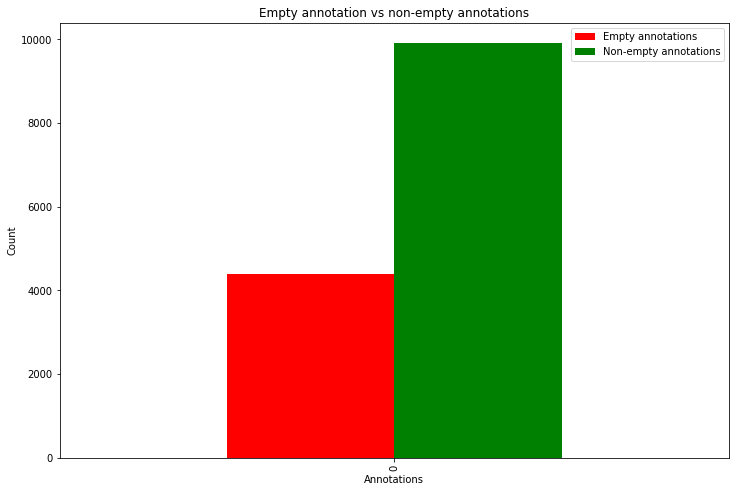

In [27]:
cond_empty_annotation = train_df.annotation == "[]"
data = {
    "Empty annotations": train_df[cond_empty_annotation].shape[0],
    "Non-empty annotations": train_df[~cond_empty_annotation].shape[0]
}
_ = pd.DataFrame(data, index=[0]) \
    .plot(kind="bar", xlabel="Annotations", ylabel="Count", 
          figsize=(12, 8), color=["r", "g"], title="Empty annotation vs non-empty annotations")

In [28]:
train_df["annotation"] = train_df.annotation.apply(lambda x: eval(x))
train_df["location"] = train_df.location.apply(lambda x: eval(x))

In [29]:
train_df["annotation_number"] = train_df.annotation.str.len()

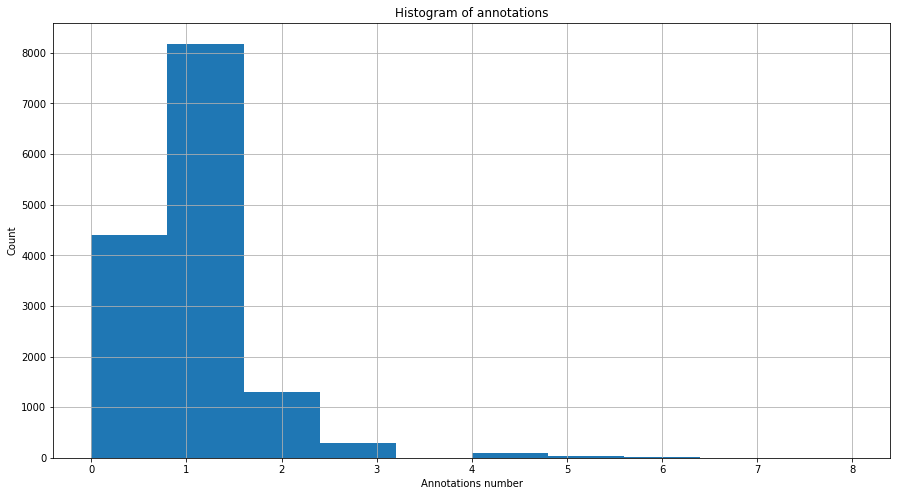

In [30]:
plot_utils.plot_histogram(
    train_df["annotation_number"], bins=10, title="Histogram of annotations", 
    x_label="Annotations number", y_label="Count")

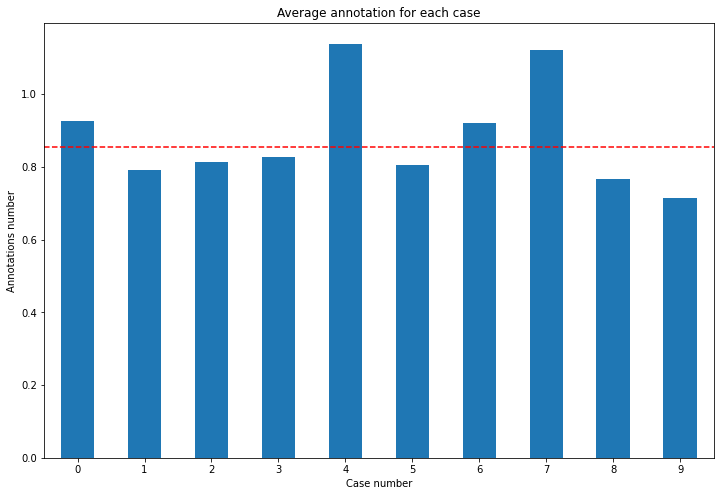

In [31]:
ax = train_df \
    .groupby("case_num") \
    .annotation_number \
    .mean() \
    .plot(kind="bar", figsize=(12, 8), rot=0, xlabel="Case number", 
          ylabel="Annotations number", title="Average annotation for each case")
_ = ax.axhline(y=train_df.annotation_number.mean(), color="r", linestyle="--")

In [32]:
annotations = []
for list_annotation in train_df.annotation.values.tolist():
    for annotation in list_annotation:
        annotations.append(annotation)
        
annotations_df = pd.DataFrame(list(set(annotations)), columns=["annotation"])
annotations_df["annotation_len"] = annotations_df.annotation.str.len()

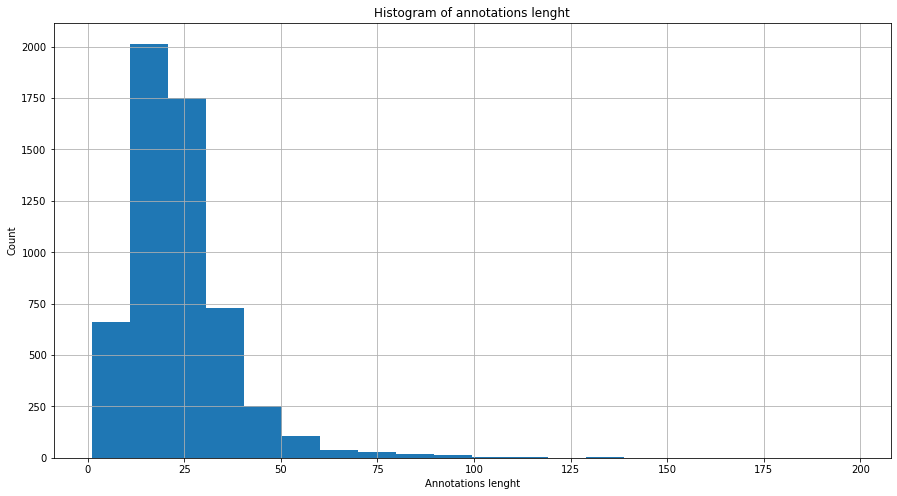

In [33]:
plot_utils.plot_histogram(
    annotations_df["annotation_len"], bins=20, title="Histogram of annotations lenght", 
    x_label="Annotations lenght", y_label="Count")

In [34]:
print(f"Mean annotations lenght {annotations_df.annotation_len.mean()}")

Mean annotations lenght 23.323906083244395


### Annotation visualitzation

In [35]:
cond_patient_id = train_df.pn_num == random_patient_id
patient_df = train_df[cond_patient_id]

In [36]:
cond_patient_notes = patient_notes_df.pn_num == random_patient_id
plot_data.plot_annotations_visualisation(
    patient_df, patient_notes_df[cond_patient_notes], show_annotation=False)

### Wordcloud of patient notes

In [37]:
all_notes = " ".join(patient_notes_df.pn_history.values.tolist())

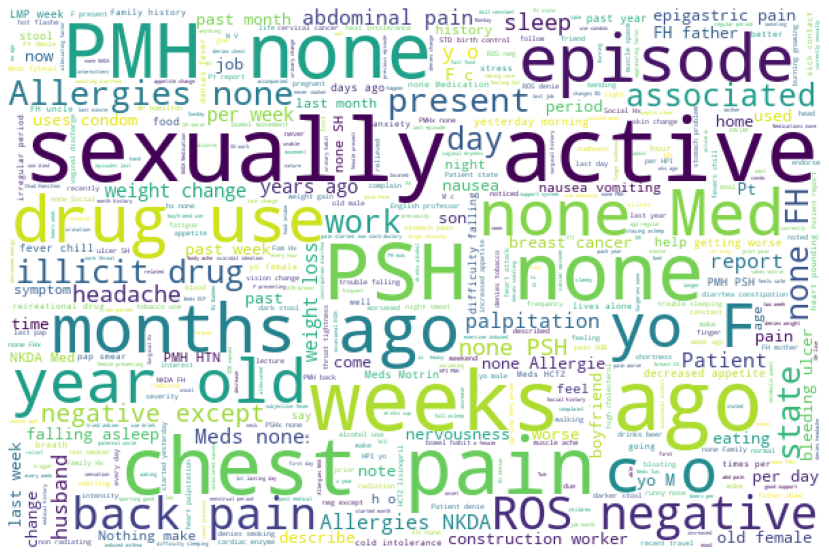

In [38]:
plot_data.plot_wordcloud(all_notes)